# **Trabajo práctico 0: Algoritmo de Maximización de la Esperanza**

Pre-requisitos para el notebook.

In [2]:
import torch
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import style
from scipy.stats import norm
# Requerido para algoritmo de maximización de la esperanza, de lo contrario se mezclan todos los plots.
%matplotlib inline 
style.use('default')

pallet = ["#1F77B4", "#B41F77", "#77B41F"]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

Using cuda


## **1. (80 puntos) Algoritmo de Maximización de la Esperanza con datos artificiales (modelo Gaussiano)**

A continuación, implemente el algoritmo de maximización de la esperanza (descrito en el material del curso), usando la definición y descripción de las siguientes funciones como base:

1. **(15 puntos)** Implemente la función $\textit{generate\_data}$ la cual reciba la cantidad de observaciones unidimensionales total a generar $N$, y los parámetros correspondientes a $K=2$ funciones de densidad **Gaussianas**. Genere los datos siguiendo tales distribuciones, y retorne tal matriz de datos $X\in\mathbb{R}^{Nx1}$.

    a) Grafique los datos usando un scatter plot junto con las gráficas de los histogramas de los datos y las funciones de densidad de probabilidad **Gaussianas** usando los parámetros para inicializar los datos, en la misma figura (gráfico). Escoja 3 conjuntos de parámetros para mostrar los 3 dataset resultantes.

In [3]:
MU_SPREAD_COEFFICIENT = 20
MU_SHIFT_COEFFICIENT = 30
SIGMA_SPREAD_COEFFICIENT = 1.5
SIGMA_SHIFT_COEFFICIENT = 3

def generate_data_gaussian(n_observations: int, k_parameters: int = 2) -> torch.Tensor:
    mus = torch.randn(k_parameters) * MU_SPREAD_COEFFICIENT + MU_SHIFT_COEFFICIENT
    sigmas = torch.abs(torch.randn(k_parameters) * SIGMA_SPREAD_COEFFICIENT + SIGMA_SHIFT_COEFFICIENT)
    # Create distributions
    distributions = torch.distributions.Normal(mus, sigmas)
    # Exact samples
    samples = distributions.sample(torch.Size([n_observations,])).t()
    return samples

randomdata = generate_data_gaussian(20)

randomdata

tensor([[25.2030, 25.3679, 28.9191, 28.8925, 31.2796, 29.0544, 30.4144, 31.1736,
         30.8321, 30.3498, 28.1047, 26.9632, 31.6845, 29.6410, 33.2228, 29.1209,
         32.6848, 28.6956, 35.8073, 33.9962],
        [40.7648, 36.6931, 36.6308, 38.8927, 38.2415, 42.5265, 37.0106, 40.1764,
         36.6277, 39.4754, 35.4120, 42.2709, 44.2875, 37.1471, 36.3270, 44.7825,
         40.4193, 43.2401, 35.8436, 42.7054]])

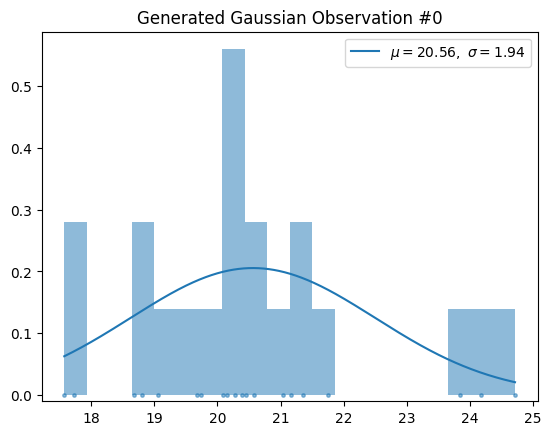

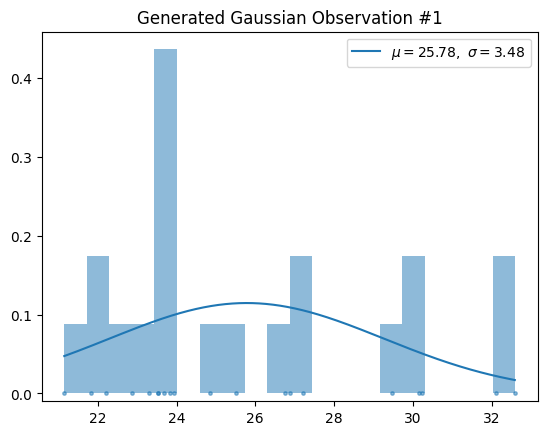

In [4]:
def plot_observation_2(observation, show=True, color=pallet[0], obs_number=1):
    fig, ax = plt.subplots()
    x_axis = torch.arange(observation.min(), observation.max(), 0.01)
    # Histogram
    ax.hist(observation, density=True, bins=20, alpha=0.5, color=color)
    # Scatter Dots
    ax.scatter(observation, torch.zeros(observation.size()), s=6, alpha=0.5, color=color)
    # Gaussian Curve
    mu = torch.mean(observation)
    sigma = torch.std(observation, unbiased=True)
    label = fr'$\mu={round(mu.item(), 2)},\ \sigma={round(sigma.item(), 2)}$'
    ax.plot(x_axis, norm.pdf(x_axis, mu, sigma), color=color, label=label)
    ax.set_title(f"Generated Gaussian Observation #{obs_number}")
    ax.legend()
    # Adjust y-axis
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 0.01, y_max)
    if show:
        plt.show()

sample = generate_data_gaussian(20)
plot_observation_2(sample[0], obs_number=0)
plot_observation_2(sample[1], obs_number=1)

2. **(5 puntos)** Implemente la función $\textit{init\_random\_parameters}$ la cual genere una matriz de $P\in\mathbb{R}^{Kx2}$ dimensiones, con los parámetros de las funciones de densidad **Gaussiana** generados completamente al azar.

    a) Muestre un pantallazo donde verifique su funcionamiento correcto con los comentarios asociados.

In [26]:
#  Genera una matriz k x 2 con mu y sigma aleatorios
def init_random_parameters(k_parameters=2):
    mus = torch.randn(k_parameters) * MU_SPREAD_COEFFICIENT + MU_SHIFT_COEFFICIENT
    sigmas = torch.abs(torch.randn(k_parameters) * SIGMA_SPREAD_COEFFICIENT + SIGMA_SHIFT_COEFFICIENT)
    return torch.stack((mus, sigmas), dim=1)

random_param = init_random_parameters(k_parameters=2)

random_param

tensor([[32.3213,  3.4664],
        [41.7711,  1.6299]])

3. **(20 puntos)** Implemente la función  $\textit{calculate\_likelihood\_gaussian\_observation(x\_n, mu\_k, sigma\_k)}$ la cual calcule la verosimilitud de una observación específica $X_{n}$, para una función de densidad Gaussiana con parámetros $\mu_{k}$ y $\sigma_{k}$.
Realice la correción pertinente al calculo de la función de verosimilitud para evitar el problema de $\textit{under flow}$.

    a) Diseñe y ejecute una prueba unitaria donde verifique su funcionamiento correcto con los comentarios asociados.

In [ ]:
# TODO

4. **(10 puntos)** Implemente la función $\textit{calculate\_membership\_dataset(X\_dataset,Parameters\_matrix)}$, la cual, usando la matriz de parámetros $P$ y la función anteriormente implementada calculate_likelihood_gaussian_observation, defina por cada observación $X_{n}\in X$ la pertenencia o membresía a  cluster $k=1,...,K$, en una matriz binaria $M\in\mathbb{R}^{NxK}$. Retorne tal matriz de membresía $M$.

    a) Diseñe y ejecute una prueba unitaria donde verifique su funcionamiento correcto con los comentarios asociados

In [ ]:
# TODO

5. **(10 puntos)** Implemente la función $\textit{recalculate\_parameters(X\_dataset, Membership\_data)}, la cual recalcule los parámetros de las funciones de densidad Gaussianas representandas en la matriz $P$, de acuerdo a lo representado en la matriz de membresía $M$.

    a)   Use las funciones $\textit{mean}$ y $\textit{std}$ de pytorch para ello. Intente prescindir al máximo de estructuras de repetición tipo $\textit{for}$.